In [23]:
import sys
sys.path.append('..')

import h5py
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import torch
import pandas as pd
import seaborn as sns

labels = {
    'Background': 0,
    'Tubules': 1,
    # 'Vein': 2,
    'Vein / Indeterminate vessel ': 2,  # Same as Vein - relabelled
    'Artery': 3,
    'Glomeruli': 4
}

alpha = 1.0
# colors = [purple, red, green, yellow, blue]
colors = [(128/255, 0, 128/255, alpha), # purple (background)
            (1, 0, 0, alpha), # red (tubules)
            (1, 1, 0, alpha), # yellow (indeterminate)
            (0, 1, 0, alpha), # green (artery)
            (0, 0, 1, alpha)] # blue (glomeruli)
cmap = mcolors.ListedColormap(colors)

In [24]:
def plot_three(img, mask, edge_map):    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(img)
    ax[0].axis('off')
    ax[0].set_title('Image')

    ax[1].imshow(mask, cmap=cmap, vmin=0, vmax=4)
    ax[1].axis('off')
    ax[1].set_title('Mask')

    ax[2].imshow(edge_map, cmap='binary')
    ax[2].axis('off')
    ax[2].set_title('Edge Map')

    plt.tight_layout()
    plt.show()

# Augmentation test

Number of training samples: 5428


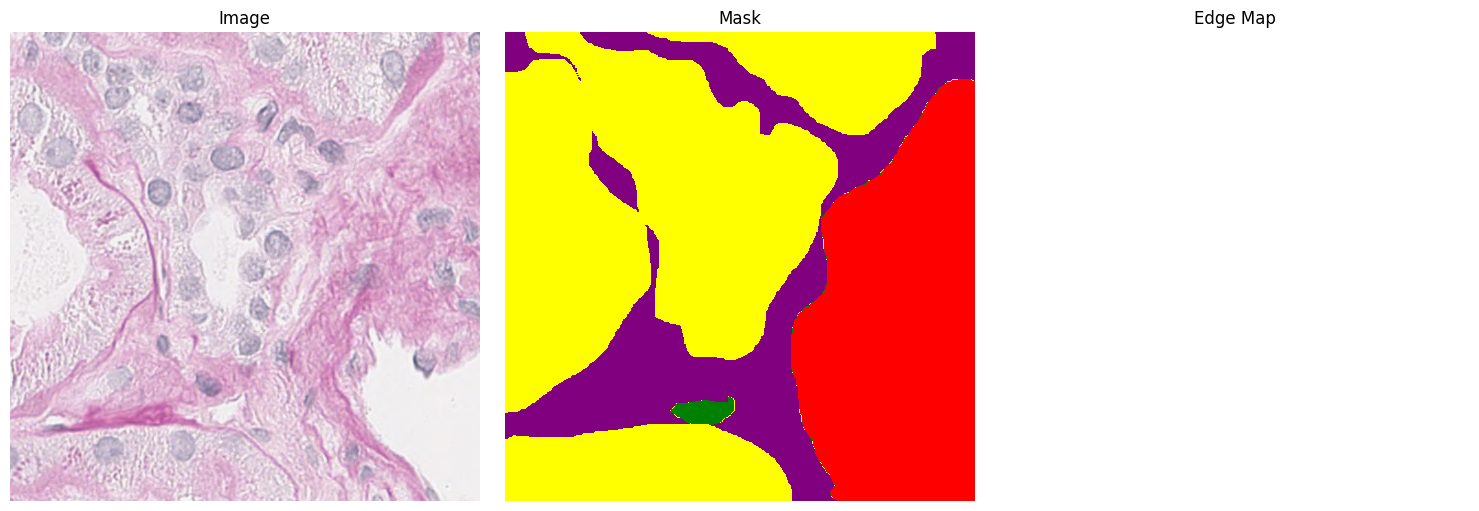

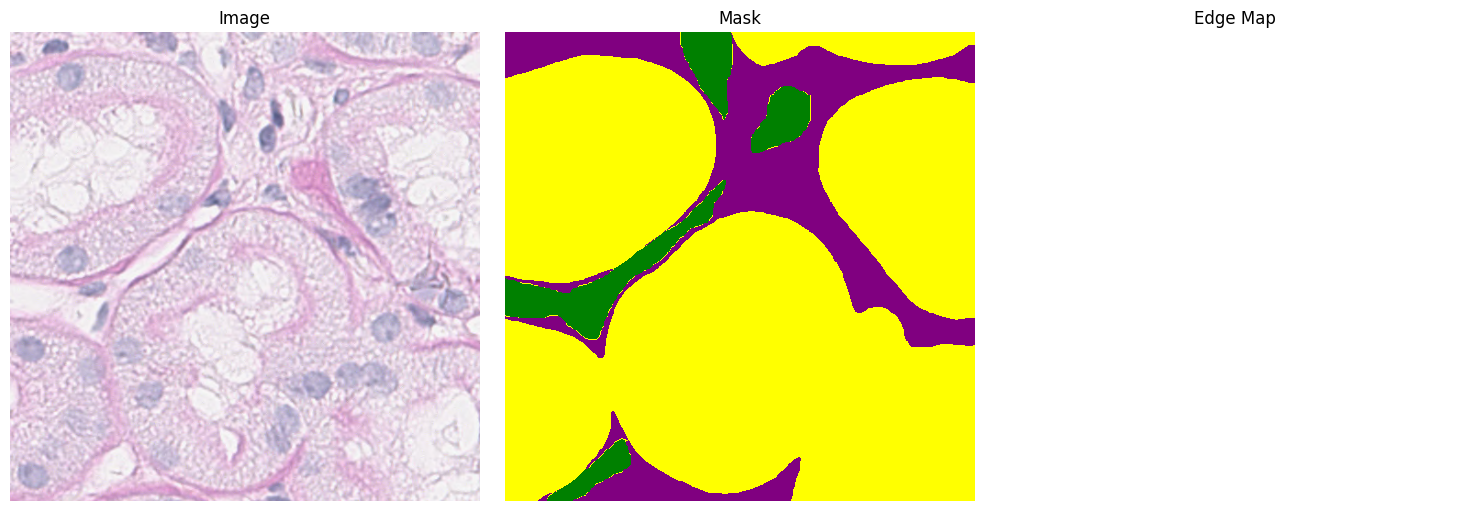

Using data augmentation
Number of training samples: 5428


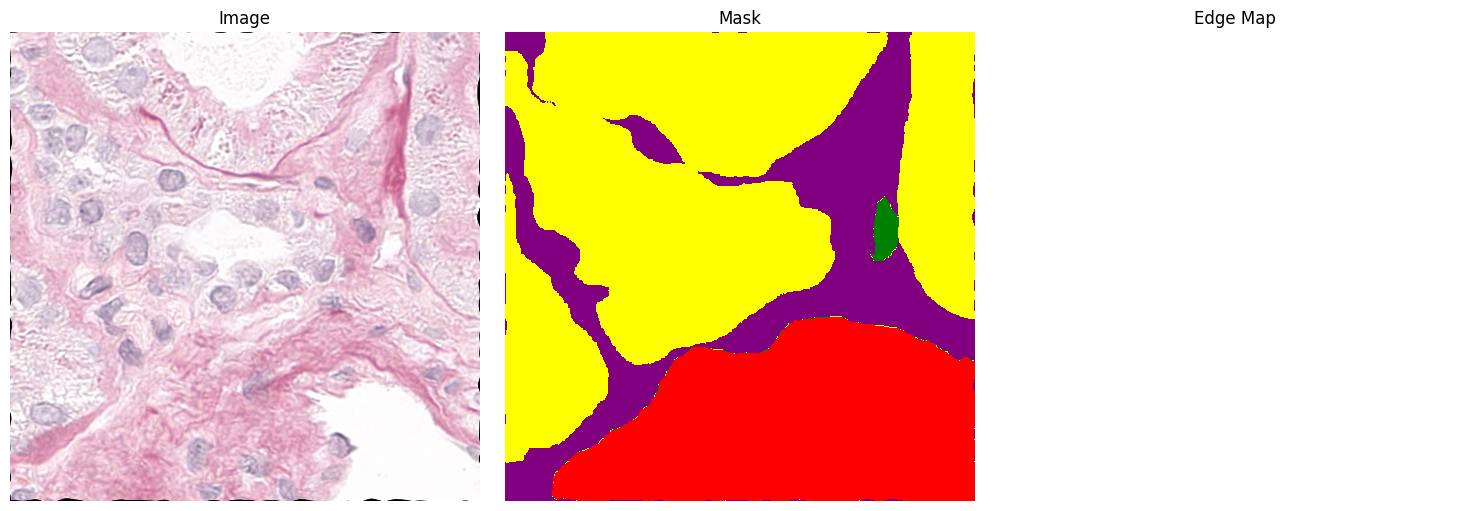

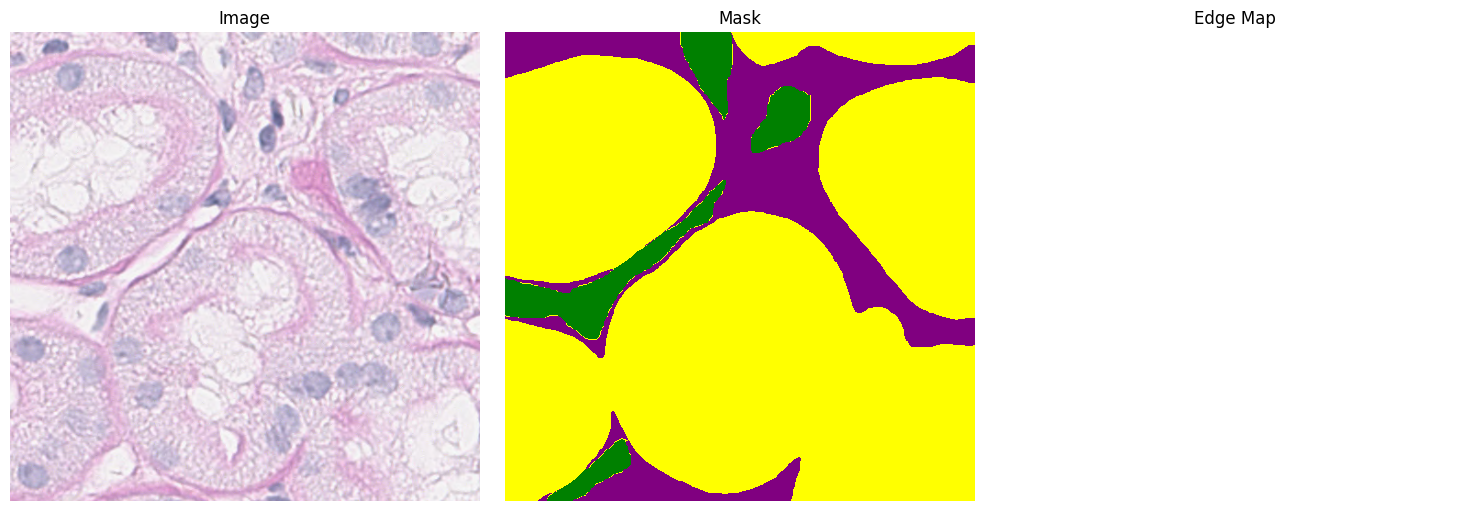

In [3]:
from utils.get_dataloaders import get_train_loaders, get_test_loader

SEED = 42
torch.manual_seed(SEED)

# Hyperparameters
train_path = '/vol/bitbucket/dks20/renal_ssn/labelbox_download/train_data_random.h5'
oversample_classes = [2, 3]
oversample_weight = 4
downsample_weight = 0.5

train_loader, val_loader = get_train_loaders(train_path=train_path,
                                            batch_size=1,
                                            augment=False,
                                            calc_edge_map=False,
                                            oversample=False, 
                                            oversample_classes=oversample_classes, 
                                            oversample_weight=oversample_weight,
                                            downsample_empty=False,
                                            downsample_weight=downsample_weight,
                                            seed=SEED)

for i, (img, mask, edge_map) in enumerate(train_loader):
    if i == 1:
        img = img / 255.0
        img = img.permute(0, 2, 3, 1).cpu().numpy()
        mask = mask.cpu().numpy()
        edge_map = edge_map.cpu().numpy()

        plot_three(img[0], mask[0], edge_map[0])
        break

for i, (img, mask, edge_map) in enumerate(val_loader):
    if i == 1:
        img = img / 255.0
        img = img.permute(0, 2, 3, 1).cpu().numpy()
        mask = mask.cpu().numpy()
        edge_map = edge_map.cpu().numpy()

        plot_three(img[0], mask[0], edge_map[0])
        break

torch.manual_seed(SEED)

train_loader_aug, val_loader_aug = get_train_loaders(train_path=train_path,
                                                    batch_size=1,
                                                    augment=True,
                                                    calc_edge_map=False,
                                                    oversample=False, 
                                                    oversample_classes=oversample_classes, 
                                                    oversample_weight=oversample_weight,
                                                    downsample_empty=False,
                                                    downsample_weight=downsample_weight,
                                                    seed=SEED)

for i, (img, mask, edge_map) in enumerate(train_loader_aug):
    if i == 1:
        img = img.permute(0, 2, 3, 1).cpu().numpy()
        mask = mask.cpu().numpy()
        edge_map = edge_map.cpu().numpy()

        plot_three(img[0], mask[0], edge_map[0])
        break

for i, (img, mask, edge_map) in enumerate(val_loader_aug):
    if i == 1:
        img = img / 255.0
        img = img.permute(0, 2, 3, 1).cpu().numpy()
        mask = mask.cpu().numpy()
        edge_map = edge_map.cpu().numpy()

        plot_three(img[0], mask[0], edge_map[0])
        break



# AUGMENTATION EXAMPLES

In [33]:
from torchvision import tv_tensors
from torchvision.transforms import v2

# mean = [0.87770971, 0.80533165, 0.8622918]
# std = [0.10774853, 0.15939812, 0.10747936]
hflip = v2.Compose([
    v2.RandomHorizontalFlip(p=1),
])
rotation = v2.Compose([
    v2.RandomRotation((90, 90)),
])
elastic = v2.Compose([
    v2.ElasticTransform(alpha=100),
])
color_jitter = v2.Compose([
    v2.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
])

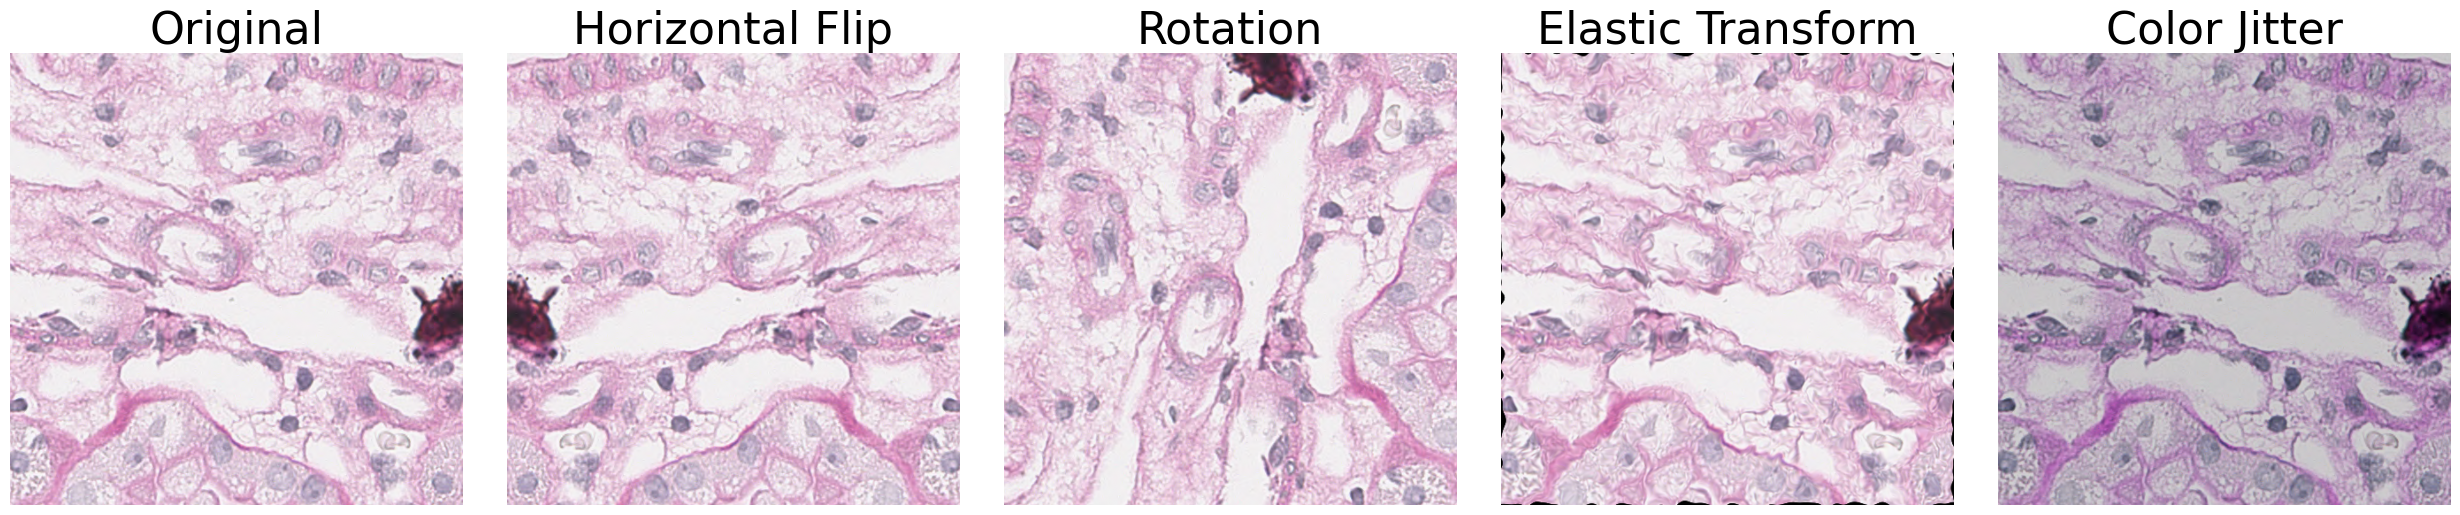

In [35]:
with h5py.File('train_data_random.h5', 'r') as hf:
    imgs = hf['data']
    masks = hf['labels']

    img = imgs[10] # shape = (512, 512, 3)
    img = img / 255.0

    fig, ax = plt.subplots(1, 5, figsize=(25, 5))
    ax[0].imshow(img)
    ax[0].axis('off')
    ax[0].set_title('Original', fontsize=32)

    # Augmentations
    img = torch.from_numpy(img).permute(2, 0, 1)
    img_tv = tv_tensors.Image(img)

    img_hflip = hflip(img_tv)
    img_rot = rotation(img_tv)
    img_elastic = elastic(img_tv)
    img_color_jitter = color_jitter(img_tv)

    # Plot
    img_hflip = img_hflip.permute(1, 2, 0).numpy()
    img_rot = img_rot.permute(1, 2, 0).numpy()
    img_elastic = img_elastic.permute(1, 2, 0).numpy()
    img_color_jitter = img_color_jitter.permute(1, 2, 0).numpy()

    ax[1].imshow(img_hflip)
    ax[1].axis('off')
    ax[1].set_title('Horizontal Flip', fontsize=32)

    ax[2].imshow(img_rot)
    ax[2].axis('off')
    ax[2].set_title('Rotation', fontsize=32)

    ax[3].imshow(img_elastic)
    ax[3].axis('off')
    ax[3].set_title('Elastic Transform', fontsize=32)

    ax[4].imshow(img_color_jitter)
    ax[4].axis('off')
    ax[4].set_title('Color Jitter', fontsize=32)

    plt.tight_layout()

    plt.savefig('aug_examples.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0.1)

    plt.show()